# 1. Import Dataset



In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [ ]:
# !pip install -q kaggle
import os

os.environ['KAGGLE_USERNAME'] = 'nisasalvia'
os.environ['KAGGLE_KEY'] = '75a45c7f7de251ea57c14063ec6fb0f9'

!kaggle datasets download -d uciml/pima-indians-diabetes-database --quiet
!unzip -q pima-indians-diabetes-database.zip

df = pd.read_csv('diabetes.csv')

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
db = df.copy()
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2. Preprocessing

## Cek Dataset

In [ ]:
len(df.columns)

9

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.rename(columns={'DiabetesPedigreeFunction': 'DPF'}, inplace=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


## Missing Values & Imputasi

In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


In [ ]:
#mengecek nilai 0 pada dataset dan menggantinya ke NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DPF,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.00,763.00,733.00,541.00,394.00,757.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.54,12.38,10.48,118.78,6.92,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,22.00,76.25,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,0.00
75%,6.00,141.00,80.00,36.00,190.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


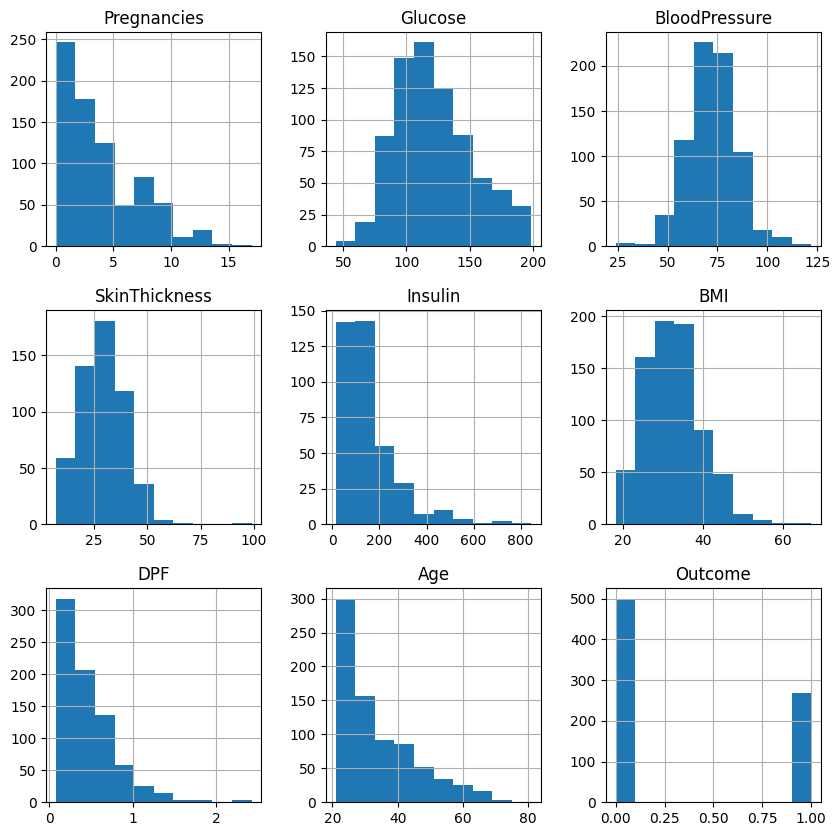

In [ ]:
p = df.hist(figsize = (10,10))

In [ ]:
#melakukan imputasi rata-rata berdasarkan outcome
imp_mean = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[imp_mean] = df.groupby('Outcome')[imp_mean].transform(lambda x: x.fillna(x.mean()))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.00,72.00,35.00,NaN,33.60,0.63,50,1
1,1,85.00,66.00,29.00,NaN,26.60,0.35,31,0
2,8,183.00,64.00,33.00,NaN,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63,0
764,2,122.00,70.00,27.00,NaN,36.80,0.34,27,0
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30,0
766,1,126.00,60.00,33.00,NaN,30.10,0.35,47,1


In [ ]:
#melakukan imputasi median berdasarkan outcome
imp_med = ['Insulin']
df[imp_med] = df.groupby('Outcome')[imp_med].transform(lambda x: x.fillna(x.median()))
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0
2,8,183.00,64.00,33.00,169.50,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
4,0,137.00,40.00,35.00,168.00,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63,0
764,2,122.00,70.00,27.00,102.50,36.80,0.34,27,0
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30,0
766,1,126.00,60.00,33.00,169.50,30.10,0.35,47,1


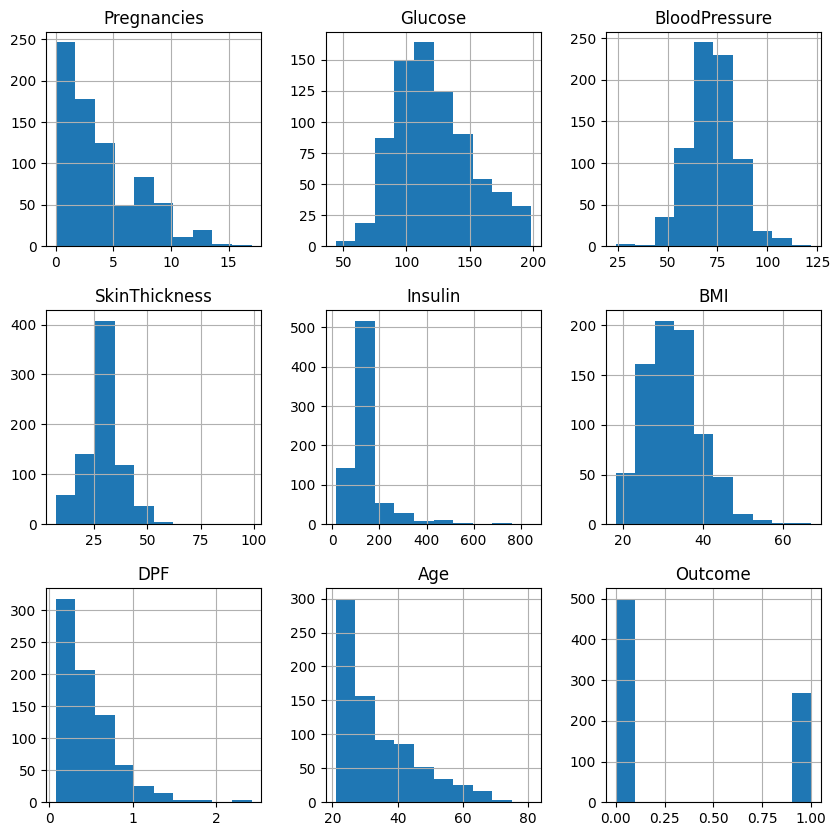

In [ ]:
p = df.hist(figsize = (10,10))

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.70,72.43,29.25,141.75,32.45,0.47,33.24,0.35
std,3.37,30.46,12.11,8.92,89.10,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,25.00,102.50,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,28.00,102.50,32.05,0.37,29.00,0.00
75%,6.00,141.00,80.00,33.00,169.50,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [ ]:
#cek data duplikat
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


## Outlier

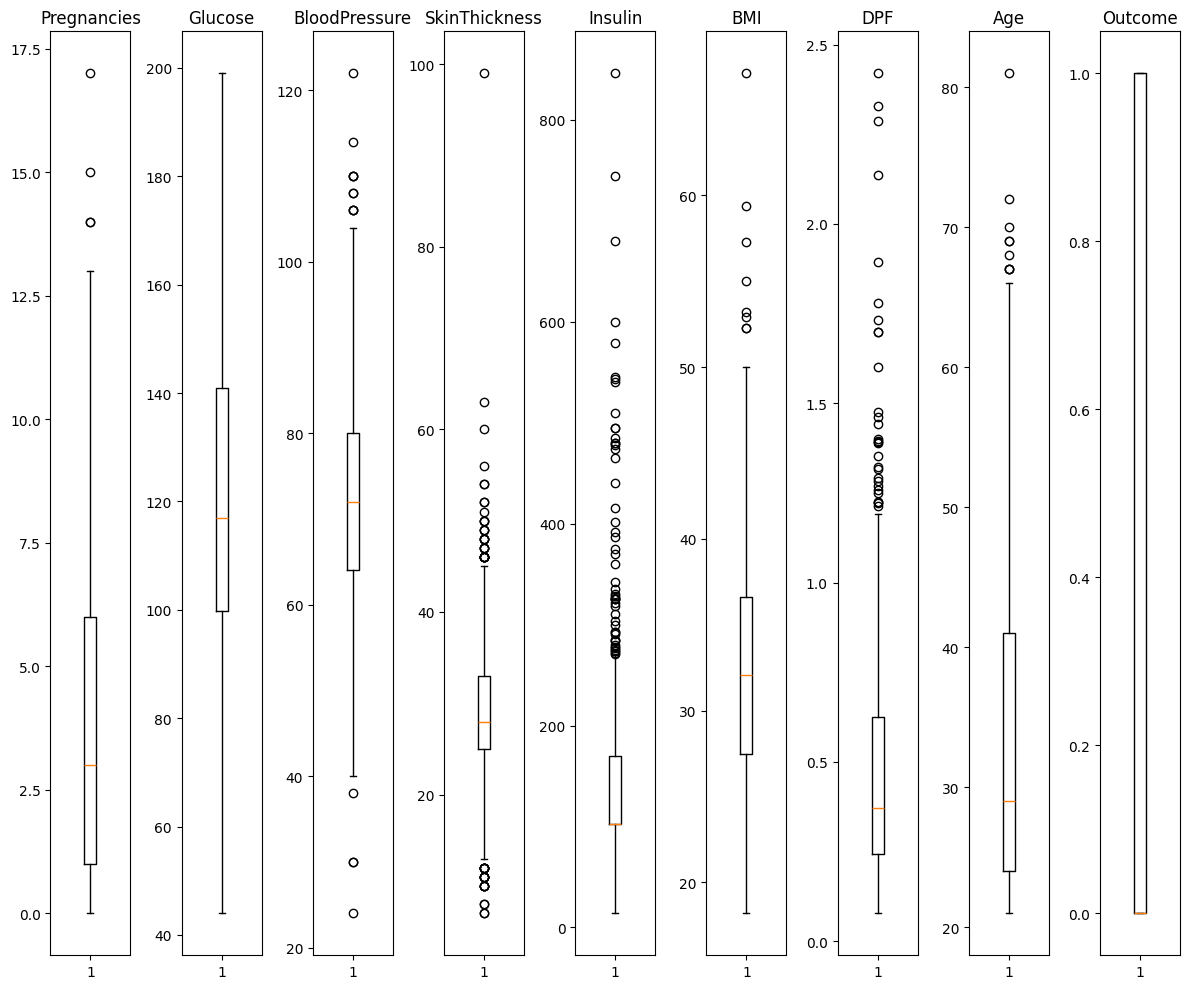

In [ ]:
numerical_features = df.select_dtypes(include='number').columns
fig, ax = plt.subplots(1, len(numerical_features), figsize=(12, 10))

for i, feature in enumerate(numerical_features):
    ax[i].boxplot(df[feature])
    ax[i].set_title(feature)

plt.tight_layout()
plt.show()

notes :    
*   max skin thickness menurut jurnal dari analisis suku itu 45 mm, maybe bisa dibuat dari 50 mm
*   untuk bagian insulin paling normal adalah 222, mungkin bisa dibuat sampe 250 batasnya.



In [ ]:
df8i = df.copy() #IQR

### IQR

In [ ]:
outlier = ['SkinThickness', 'Insulin', 'DPF']

def remove_outliers(dfis, columns, threshold=1.5):
  cleaned = []
  for df in dfis:
      df_clean = df.copy()
      for col in columns:
          Q1 = df_clean[col].quantile(0.25)
          Q3 = df_clean[col].quantile(0.75)
          IQR = Q3 - Q1
          lower_bound = Q1 - threshold * IQR
          upper_bound = Q3 + threshold * IQR
          df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
      cleaned.append(df_clean)
  return cleaned

dfis = [df8i, df5i, df4i]

df8i, df5i, df4i = remove_outliers(dfis, outlier, threshold=2.0)  # Meningkatkan threshold dari 1.5 ke 2.0
df8i

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.00,72.00,35.00,169.50,33.60,0.63,50,1
1,1,85.00,66.00,29.00,102.50,26.60,0.35,31,0
2,8,183.00,64.00,33.00,169.50,23.30,0.67,32,1
3,1,89.00,66.00,23.00,94.00,28.10,0.17,21,0
5,5,116.00,74.00,27.24,102.50,25.60,0.20,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.00,76.00,48.00,180.00,32.90,0.17,63,0
764,2,122.00,70.00,27.00,102.50,36.80,0.34,27,0
765,5,121.00,72.00,23.00,112.00,26.20,0.24,30,0
766,1,126.00,60.00,33.00,169.50,30.10,0.35,47,1


In [ ]:
df8i.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,701.00,701.00,701.00,701.00,701.00,701.00,701.00,701.00,701.00
mean,3.88,119.53,72.50,28.70,126.06,32.13,0.44,33.18,0.34
std,3.36,29.34,12.14,7.80,50.81,6.72,0.27,11.72,0.47
min,0.00,44.00,24.00,10.00,15.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,64.00,25.00,102.50,27.40,0.24,24.00,0.00
50%,3.00,115.00,72.00,27.24,102.50,32.00,0.36,29.00,0.00
75%,6.00,137.00,80.00,33.00,169.50,36.00,0.59,40.00,1.00
max,17.00,198.00,122.00,49.00,300.00,67.10,1.32,81.00,1.00


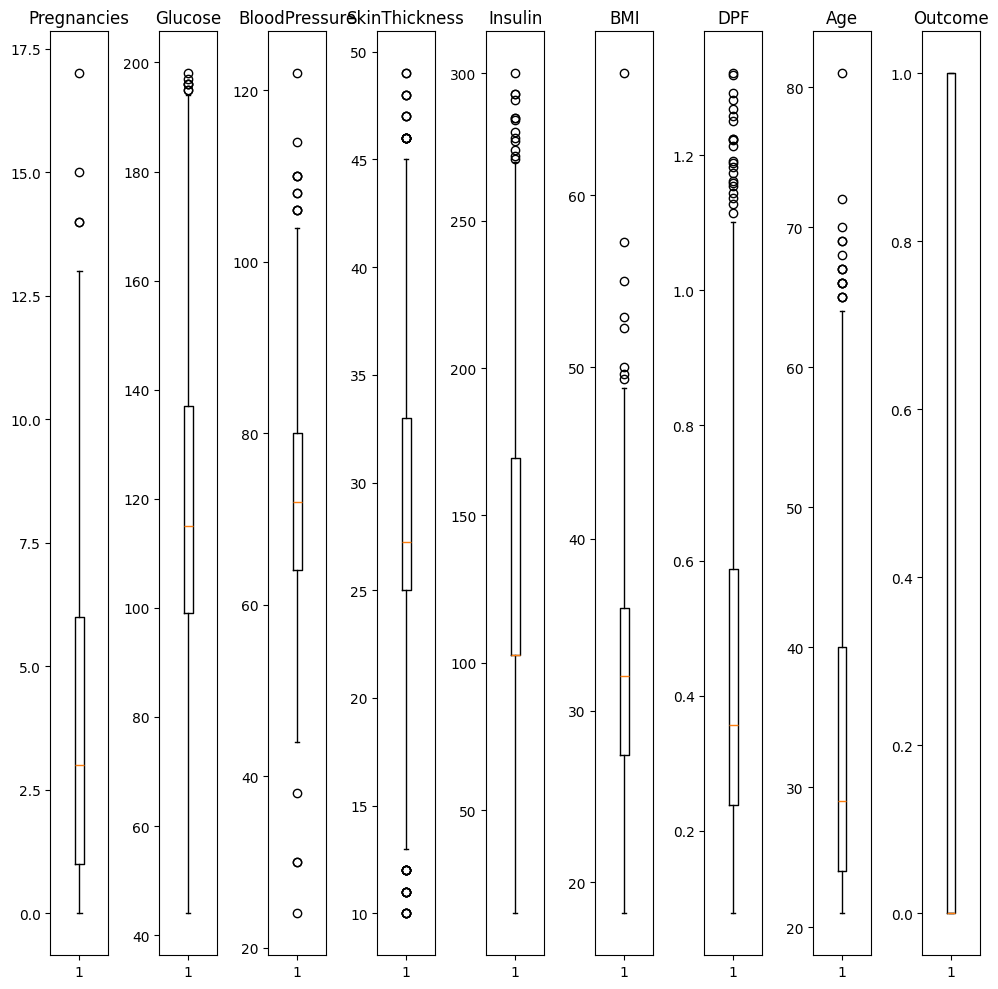

In [ ]:
numerical_features = df8i.select_dtypes(include='number').columns
fig, ax = plt.subplots(1, len(numerical_features), figsize=(10, 10))

for i, feature in enumerate(numerical_features):
    ax[i].boxplot(df8i[feature])
    ax[i].set_title(feature)

plt.tight_layout()
plt.show()

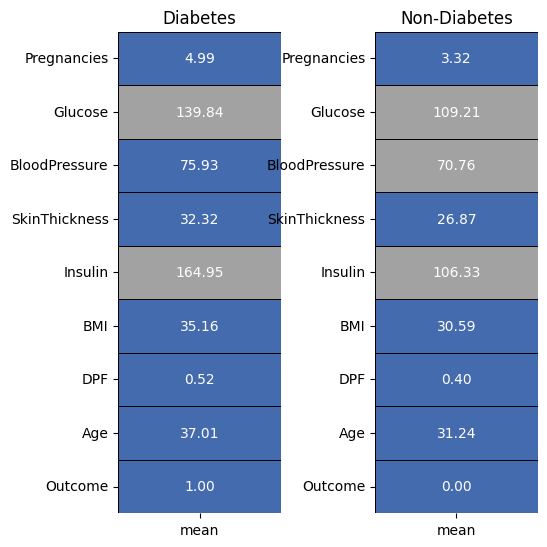

In [ ]:
colors = ['#446BAD','#A2A2A2']

diabetes = df8i[df8i['Outcome'] == 1].describe().T
non_diabetes = df8i[df8i['Outcome'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(diabetes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Diabetes');

plt.subplot(1,2,2)
sns.heatmap(non_diabetes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Non-Diabetes');

fig.tight_layout(pad = -1)

## Normalisasi

MinMax digunakan untuk yang memiliki distribusi normal.
Standarisasi digunakan untuk yang memiliki skewed data.

### IQR

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DPF'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

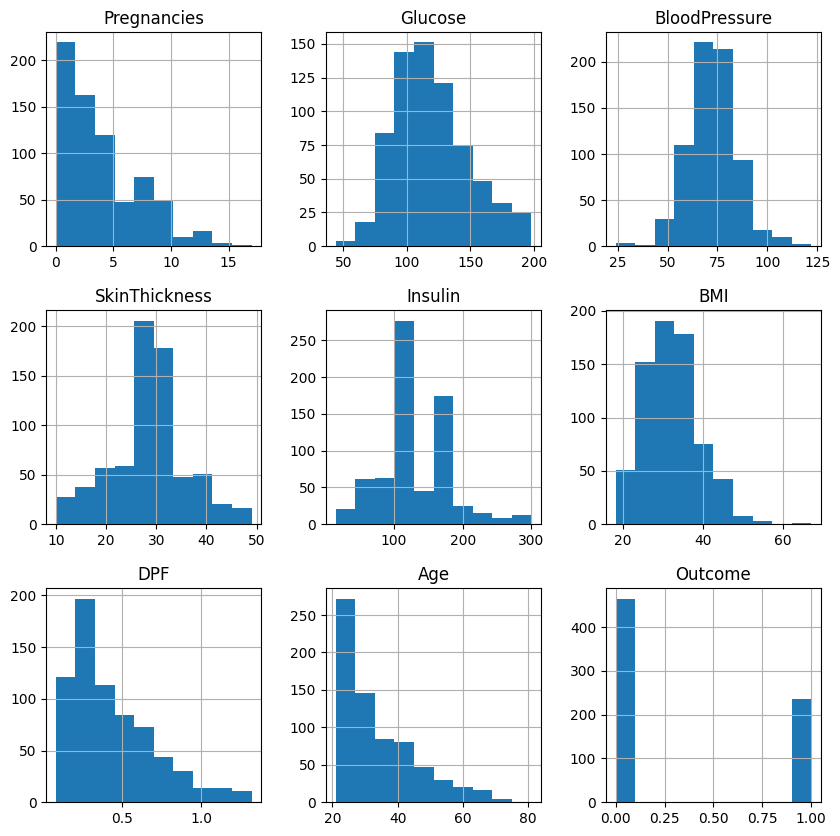

In [ ]:
df8i.hist(figsize = (10,10))

skewed : pregnancies, insulin, DPF, Age

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

standard = ['Pregnancies', 'Insulin', 'DPF', 'Age']
minmax = ['BloodPressure', 'SkinThickness', 'Glucose', 'BMI']

for df in [df8i, df5i, df4i]:
    for col in standard:
        df[col] = ss.fit_transform(df[[col]])
    for col in minmax:
        df[col] = mms.fit_transform(df[[col]])

df8i.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,0.63,0.68,0.49,0.64,0.86,0.31,0.72,1.44,1
1,-0.86,0.27,0.43,0.49,-0.46,0.17,-0.32,-0.19,0
2,1.23,0.90,0.41,0.59,0.86,0.10,0.89,-0.10,1
3,-0.86,0.29,0.43,0.33,-0.63,0.20,-1.02,-1.04,0
5,0.33,0.47,0.51,0.44,-0.46,0.15,-0.89,-0.27,0


## Analisis Korelasi Pearson

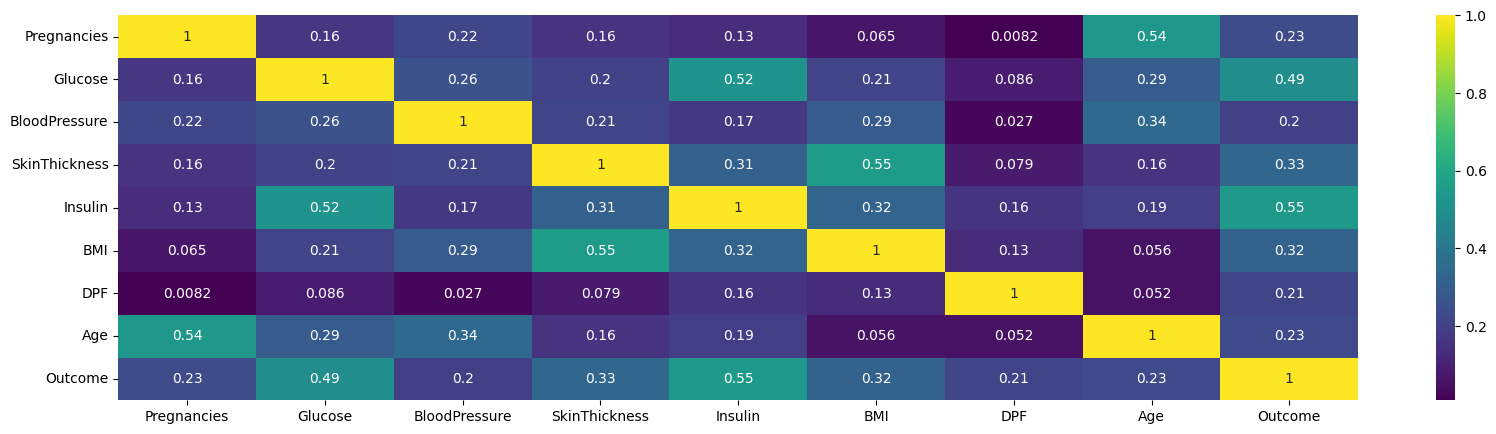

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(df8i.corr(),cmap = 'viridis',annot = True);

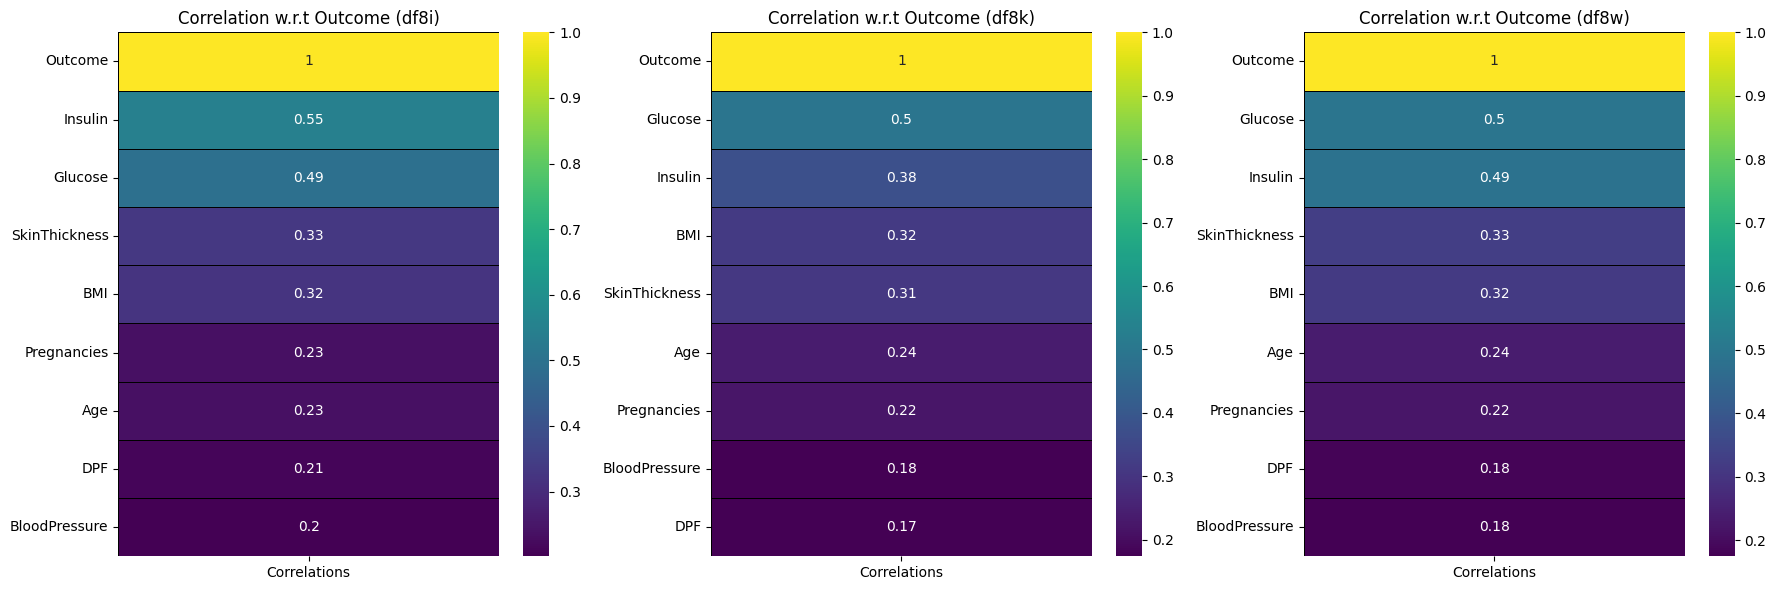

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

#df8i
corr_i = df8i.corrwith(df8i['Outcome']).sort_values(ascending=False).to_frame()
corr_i.columns = ['Correlations']
sns.heatmap(corr_i, annot=True, cmap='viridis', linewidths=0.4, linecolor='black', ax=axs[0])
axs[0].set_title('Correlation w.r.t Outcome (df8i)')

#df8k
corr_k = df8k.corrwith(df8k['Outcome']).sort_values(ascending=False).to_frame()
corr_k.columns = ['Correlations']
sns.heatmap(corr_k, annot=True, cmap='viridis', linewidths=0.4, linecolor='black', ax=axs[1])
axs[1].set_title('Correlation w.r.t Outcome (df8k)')

#df8w
corr_w = df8w.corrwith(df8w['Outcome']).sort_values(ascending=False).to_frame()
corr_w.columns = ['Correlations']
sns.heatmap(corr_w, annot=True, cmap='viridis', linewidths=0.4, linecolor='black', ax=axs[2])
axs[2].set_title('Correlation w.r.t Outcome (df8w)')

plt.tight_layout()
plt.show()

## Feature Engineering (ANNOVA)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                      'Insulin', 'BMI', 'DPF', 'Age']
categorical_features = ['Outcome']

def get_anova_scores(df):
    features = df.loc[:, numerical_features]
    target = df.loc[:, categorical_features]
    selector = SelectKBest(score_func=f_classif, k='all')
    fit = selector.fit(features, target)
    scores_df = pd.DataFrame(fit.scores_, index=features.columns, columns=['ANOVA Score'])
    return scores_df.sort_values(by='ANOVA Score', ascending=False)

### 8 Fitur

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


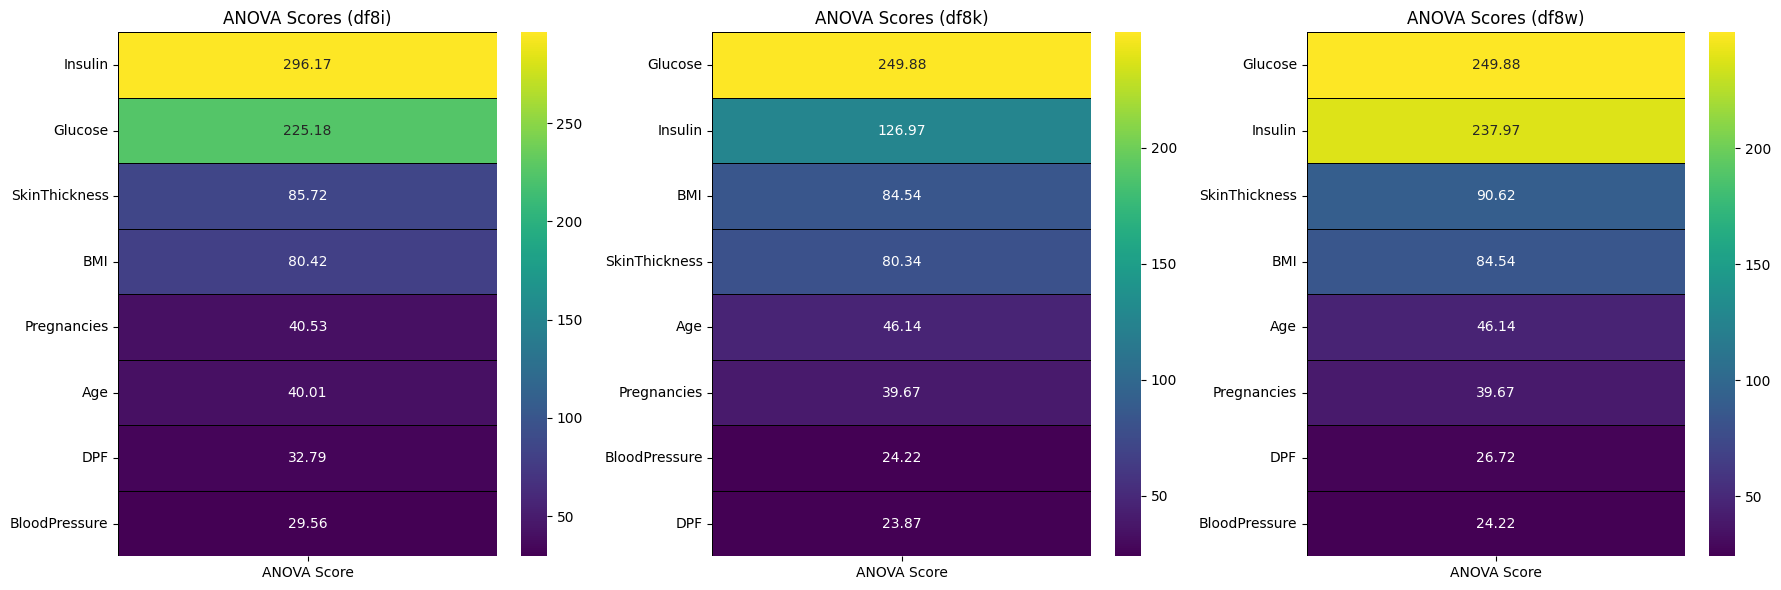

In [ ]:
anova_8i = get_anova_scores(df8i)
anova_8k = get_anova_scores(df8k)
anova_8w = get_anova_scores(df8w)

# Buat 3 heatmap berdampingan
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(anova_8i, annot=True, cmap='viridis', linewidths=0.4, linecolor='black',
            fmt='.2f', ax=axs[0])
axs[0].set_title('ANOVA Scores (df8i)')

sns.heatmap(anova_8k, annot=True, cmap='viridis', linewidths=0.4, linecolor='black',
            fmt='.2f', ax=axs[1])
axs[1].set_title('ANOVA Scores (df8k)')

sns.heatmap(anova_8w, annot=True, cmap='viridis', linewidths=0.4, linecolor='black',
            fmt='.2f', ax=axs[2])
axs[2].set_title('ANOVA Scores (df8w)')

plt.tight_layout()
plt.show()

In [ ]:
f8i = df8i.iloc[:,:8].values
t8i = df8i.iloc[:,8].values

f8k = df8k.iloc[:,:8].values
t8k = df8k.iloc[:,8].values

f8w = df8w.iloc[:,:8].values
t8w = df8w.iloc[:,8].values

## Sampling Data

### IQR

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='auto', random_state=42)
f8i, t8i = smote.fit_resample(f8i, t8i)
f5i, t5i = smote.fit_resample(f5i, t5i)
f4i, t4i = smote.fit_resample(f4i, t4i)

c8i = Counter(t8i)
c5i = Counter(t5i)
c4i = Counter(t4i)

counter_df = pd.DataFrame({
    't8i': pd.Series(c8i),
    't5i': pd.Series(c5i),
    't4i': pd.Series(c4i)
}).astype(int)

print(counter_df)

   t8i  t5i  t4i
1  465  465  465
0  465  465  465


## Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
# 8 Feature Set
x_train_8i, x_test_8i, y_train_8i, y_test_8i = train_test_split(f8i, t8i, test_size=0.20, stratify=t8i, random_state=2)  # 8I
x_train_8k, x_test_8k, y_train_8k, y_test_8k = train_test_split(f8k, t8k, test_size=0.20, stratify=t8k, random_state=2)  # 8K
x_train_8w, x_test_8w, y_train_8w, y_test_8w = train_test_split(f8w, t8w, test_size=0.20, stratify=t8w, random_state=2)  # 8W

## Reshape data

In [ ]:
# 8 Features
x_train_8i = x_train_8i.reshape(-1, 8, 1)
x_test_8i = x_test_8i.reshape(-1, 8, 1)

x_train_8k = x_train_8k.reshape(-1, 8, 1)
x_test_8k = x_test_8k.reshape(-1, 8, 1)

x_train_8w = x_train_8w.reshape(-1, 8, 1)
x_test_8w = x_test_8w.reshape(-1, 8, 1)

In [ ]:
print(x_train_8i.shape)
print(x_test_8i.shape)

(744, 8, 1)
(186, 8, 1)
(800, 5, 1)
(200, 4, 1)


# Build Model CNN

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [ ]:
param_learning_rates = [1e-2, 1e-3, 1e-4]
param_filters = [16, 32, 64]
param_kernel_size = [2, 3]

#untuk 4-5 fitur
param_kernel_size2 = [1, 2]
param_filters2 = [16, 32]

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

## 8 Fitur

In [ ]:
def build_model(
    input_shape=(8, 1),
    lr=0.001,          # learning rate
    n_filters=32,      # jumlah filter
    kernel_size=3,     # ukuran kernel
    dropout_rate=0.0,  # dropout
):
    model = Sequential()
    model.add(Conv1D(filters=n_filters,
                     kernel_size=kernel_size,
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    # model.add(Conv1D(filters=n_filters*2, kernel_size=kernel_size, activation='relu'))
    # model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())

    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=lr)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

### 8 IQR

In [ ]:
best_config8i = None
best_accuracy8i = 0.0

# Looping semua kombinasi
for lr in param_learning_rates:
    for f in param_filters:
        for k in param_kernel_size:

            cv_accuracies8i = []

           # 4.1 Looping untuk tiap fold
            for train_index_8i, val_index_8i in skf.split(x_train_8i, y_train_8i):
                X_fold_train_8i = x_train_8i[train_index_8i]
                X_fold_val_8i   = x_train_8i[val_index_8i]
                y_fold_train_8i = y_train_8i[train_index_8i]
                y_fold_val_8i   = y_train_8i[val_index_8i]

                # 4.2 Build model
                model_8i = build_model(
                    input_shape=(8, 1),
                    lr=lr,
                    n_filters=f,
                    kernel_size=k,
                    dropout_rate=0.2
                )

                # Callback EarlyStopping
                es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

                # Training
                history8i = model_8i.fit(
                    x_train_8i, y_train_8i,
                    epochs=100,            #edit
                    batch_size=32,        #edit
                    validation_data=(X_fold_val_8i, y_fold_val_8i),
                    callbacks=[es],
                    verbose=0  # 1 jika ingin menampilkan progres training
                )

                # Evaluasi pada fold ini
                loss8i, accuracy8i = model_8i.evaluate(X_fold_val_8i, y_fold_val_8i, verbose=1)
                cv_accuracies8i.append(accuracy8i)

            # Rata-rata akurasi dari K-Fold
            mean_acc8i = np.mean(cv_accuracies8i)

            # Simpan config terbaik
            if mean_acc8i > best_accuracy8i:
                best_accuracy8i = mean_acc8i
                best_config8i = (lr, f, k)

            print(f"[INFO] LR={lr}, Filters={f}, KernelSize={k}, MeanCVAcc={mean_acc8i:.4f}")

print("========================================================")
print(f"Best Config: LR={best_config8i[0]}, Filters={best_config8i[1]}, Kernel={best_config8i[2]}")
print(f"Best Mean CV Accuracy: {best_accuracy8i:.4f}")
print("========================================================")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9230 - loss: 0.2478
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8939 - loss: 0.2463
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8995 - loss: 0.2384
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9051 - loss: 0.2856
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8898 - loss: 0.1971
[INFO] LR=0.01, Filters=16, KernelSize=2, MeanCVAcc=0.8925


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9048 - loss: 0.2320
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8919 - loss: 0.2159
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9070 - loss: 0.2020
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9109 - loss: 0.2928
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9140 - loss: 0.1592
[INFO] LR=0.01, Filters=16, KernelSize=3, MeanCVAcc=0.9059


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9389 - loss: 0.1915
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9146 - loss: 0.1911
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9206 - loss: 0.1713
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9539 - loss: 0.1253 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9034 - loss: 0.1920
[INFO] LR=0.01, Filters=32, KernelSize=2, MeanCVAcc=0.9247


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9139 - loss: 0.2595
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9290 - loss: 0.1609
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8833 - loss: 0.3108
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9189 - loss: 0.1507
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8916 - loss: 0.2473
[INFO] LR=0.01, Filters=32, KernelSize=3, MeanCVAcc=0.9046


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9670 - loss: 0.1017
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9098 - loss: 0.2015
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8828 - loss: 0.2640
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9362 - loss: 0.1589
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9465 - loss: 0.1252
[INFO] LR=0.01, Filters=64, KernelSize=2, MeanCVAcc=0.9234


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9216 - loss: 0.2136
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9236 - loss: 0.2032
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9158 - loss: 0.1814
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9608 - loss: 0.1093
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8876 - loss: 0.2314
[INFO] LR=0.01, Filters=64, KernelSize=3, MeanCVAcc=0.9180


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9060 - loss: 0.2501
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8624 - loss: 0.2908
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8791 - loss: 0.2869
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9182 - loss: 0.2458
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8893 - loss: 0.2472
[INFO] LR=0.001, Filters=16, KernelSize=2, MeanCVAcc=0.8858


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9157 - loss: 0.2661
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8673 - loss: 0.2987
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8602 - loss: 0.3080
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9017 - loss: 0.2696
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8987 - loss: 0.2541
[INFO] LR=0.001, Filters=16, KernelSize=3, MeanCVAcc=0.8912


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8955 - loss: 0.2489
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8804 - loss: 0.2784
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9073 - loss: 0.2489
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9182 - loss: 0.2713
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8893 - loss: 0.2762
[INFO] LR=0.001, Filters=32, KernelSize=2, MeanCVAcc=0.8871


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9191 - loss: 0.2478
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8971 - loss: 0.2446
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8909 - loss: 0.2599
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9017 - loss: 0.2813
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9065 - loss: 0.2409
[INFO] LR=0.001, Filters=32, KernelSize=3, MeanCVAcc=0.9006


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8876 - loss: 0.2448
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8834 - loss: 0.2430
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8942 - loss: 0.2578
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9051 - loss: 0.3083 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8916 - loss: 0.2451
[INFO] LR=0.001, Filters=64, KernelSize=2, MeanCVAcc=0.8844


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9030 - loss: 0.2468
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8905 - loss: 0.2519
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8808 - loss: 0.2468
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9154 - loss: 0.2212
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8934 - loss: 0.2349
[INFO] LR=0.001, Filters=64, KernelSize=3, MeanCVAcc=0.8992


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8831 - loss: 0.2985
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8234 - loss: 0.3950
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8439 - loss: 0.3927
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8789 - loss: 0.3872
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8827 - loss: 0.3308
[INFO] LR=0.0001, Filters=16, KernelSize=2, MeanCVAcc=0.8576


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8915 - loss: 0.2874 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8614 - loss: 0.3849
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8514 - loss: 0.3887
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8684 - loss: 0.3652
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8827 - loss: 0.3273
[INFO] LR=0.0001, Filters=16, KernelSize=3, MeanCVAcc=0.8643


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9024 - loss: 0.2868
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8702 - loss: 0.3770
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8549 - loss: 0.3541
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8737 - loss: 0.3810
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8951 - loss: 0.3104
[INFO] LR=0.0001, Filters=32, KernelSize=2, MeanCVAcc=0.8750


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9029 - loss: 0.2760
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8666 - loss: 0.3582
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8549 - loss: 0.3582
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9051 - loss: 0.3380
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8916 - loss: 0.3202
[INFO] LR=0.0001, Filters=32, KernelSize=3, MeanCVAcc=0.8777


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8805 - loss: 0.2784
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8287 - loss: 0.3402
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8418 - loss: 0.3455
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8920 - loss: 0.3464
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8916 - loss: 0.2939
[INFO] LR=0.0001, Filters=64, KernelSize=2, MeanCVAcc=0.8656


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8968 - loss: 0.2658 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8642 - loss: 0.3272
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8680 - loss: 0.3458
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9073 - loss: 0.3212
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8951 - loss: 0.3034
[INFO] LR=0.0001, Filters=64, KernelSize=3, MeanCVAcc=0.8831
Best Config: LR=0.01, Filters=32, Kernel=2
Best Mean CV Accuracy: 0.9247


In [ ]:
best_lr, best_filters, best_k = best_config8i

model_final_8i = build_model(
    input_shape=(8, 1),
    lr=best_lr,
    n_filters=best_filters,
    kernel_size=best_k,
    dropout_rate=0.2
)

es_final_8i = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Latih dengan semua data train (atau pakai validation_split, atau siapkan data val lain)
history_final_8i = model_final_8i.fit(
    x_train_8i, y_train_8i,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es_final_8i],
    verbose=1
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7164 - loss: 0.5360 - val_accuracy: 0.8255 - val_loss: 0.5357
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8555 - loss: 0.4308 - val_accuracy: 0.8389 - val_loss: 0.4265
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8894 - loss: 0.3275 - val_accuracy: 0.8322 - val_loss: 0.4176
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8715 - loss: 0.3118 - val_accuracy: 0.8121 - val_loss: 0.4230
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8618 - loss: 0.3231 - val_accuracy: 0.8188 - val_loss: 0.4397
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8856 - loss: 0.3170 - val_accuracy: 0.8054 - val_loss: 0.4211
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8898 - loss: 0.2945 - val_accuracy: 0.8389 - val_loss: 0.4102
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8849 - loss: 0.2949 - val_accuracy: 0.7987 

In [ ]:
test_loss8i, test_acc8i = model_final_8i.evaluate(x_test_8i, y_test_8i, verbose=0)
print(f"Test Accuracy: {test_acc8i:.4f}")

Test Accuracy: 0.8817


In [ ]:
import pickle
with open("summary_8i.pkl", "wb") as f:
    pickle.dump({
        "best_accuracy": best_accuracy8i,
        "test_accuracy": test_acc8i,
        "best_config":   best_config8i
    }, f)

### 8 KNN

In [ ]:
best_config8k = None
best_accuracy8k = 0.0

# Looping semua kombinasi
for lr in param_learning_rates:
    for f in param_filters:
        for k in param_kernel_size:

            cv_accuracies8k = []

            # 4.1 Looping untuk tiap fold
            for train_index_8k, val_index_8k in skf.split(x_train_8k, y_train_8k):
                X_fold_train_8k = x_train_8k[train_index_8k]
                X_fold_val_8k   = x_train_8k[val_index_8k]
                y_fold_train_8k = y_train_8k[train_index_8k]
                y_fold_val_8k   = y_train_8k[val_index_8k]

                # 4.2 Build model
                model_8k = build_model(
                    input_shape=(8, 1),
                    lr=lr,
                    n_filters=f,
                    kernel_size=k,
                    dropout_rate=0.2
                )

                # Callback EarlyStopping
                es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

                # Training
                history8k = model_8k.fit(
                    X_fold_train_8k, y_fold_train_8k,
                    epochs=100,            # bisa disesuaikan
                    batch_size=32,        # bisa disesuaikan
                    validation_data=(X_fold_val_8k, y_fold_val_8k),
                    callbacks=[es],
                    verbose=0  # ubah ke 1 jika ingin lihat progres training
                )

                # Evaluasi pada fold ini
                loss8k, accuracy8k = model_8k.evaluate(X_fold_val_8k, y_fold_val_8k, verbose=1)
                cv_accuracies8k.append(accuracy8k)

            # Rata-rata akurasi dari K-Fold
            mean_acc8k = np.mean(cv_accuracies8k)

            # Simpan config terbaik
            if mean_acc8k > best_accuracy8k:
                best_accuracy8k = mean_acc8k
                best_config8k = (lr, f, k)

            print(f"[INFO] LR={lr}, Filters={f}, KernelSize={k}, MeanCVAcc={mean_acc8k:.4f}")

print("========================================================")
print(f"Best Config: LR={best_config8k[0]}, Filters={best_config8k[1]}, Kernel={best_config8k[2]}")
print(f"Best Mean CV Accuracy: {best_accuracy8k:.4f}")
print("========================================================")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8750 - loss: 0.3524
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9251 - loss: 0.2566
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8918 - loss: 0.2624
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9028 - loss: 0.2421
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9083 - loss: 0.2394
[INFO] LR=0.01, Filters=16, KernelSize=2, MeanCVAcc=0.8875


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8827 - loss: 0.3236
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9129 - loss: 0.2950 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8739 - loss: 0.3054 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8898 - loss: 0.2159 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8963 - loss: 0.2650
[INFO] LR=0.01, Filters=16, KernelSize=3, MeanCVAcc=0.8825


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8810 - loss: 0.3113 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9064 - loss: 0.2615 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8558 - loss: 0.3055
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8960 - loss: 0.2696 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8714 - loss: 0.2743
[INFO] LR=0.01, Filters=32, KernelSize=2, MeanCVAcc=0.8688


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8861 - loss: 0.3025 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9174 - loss: 0.2712 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8923 - loss: 0.3212
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9157 - loss: 0.2166
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8938 - loss: 0.2550 
[INFO] LR=0.01, Filters=32, KernelSize=3, MeanCVAcc=0.8863


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8835 - loss: 0.3264 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9217 - loss: 0.2449
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8665 - loss: 0.3025
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8960 - loss: 0.2466
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8982 - loss: 0.2544 
[INFO] LR=0.01, Filters=64, KernelSize=2, MeanCVAcc=0.8788


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8861 - loss: 0.3208
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9127 - loss: 0.2896
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8705 - loss: 0.3155
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9095 - loss: 0.2258
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8865 - loss: 0.2604
[INFO] LR=0.01, Filters=64, KernelSize=3, MeanCVAcc=0.8825


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8801 - loss: 0.3576
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9119 - loss: 0.2691
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8536 - loss: 0.3608
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8831 - loss: 0.2773 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8993 - loss: 0.3050 
[INFO] LR=0.001, Filters=16, KernelSize=2, MeanCVAcc=0.8750


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8905 - loss: 0.3334
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9139 - loss: 0.2747 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8695 - loss: 0.3339
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9201 - loss: 0.2424
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8854 - loss: 0.3086
[INFO] LR=0.001, Filters=16, KernelSize=3, MeanCVAcc=0.8825


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8801 - loss: 0.3279
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9132 - loss: 0.2645 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8685 - loss: 0.3143
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9123 - loss: 0.2542
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8859 - loss: 0.2910 
[INFO] LR=0.001, Filters=32, KernelSize=2, MeanCVAcc=0.8812


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9034 - loss: 0.3128
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9101 - loss: 0.2494
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8579 - loss: 0.3455
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9201 - loss: 0.2220
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8882 - loss: 0.2841
[INFO] LR=0.001, Filters=32, KernelSize=3, MeanCVAcc=0.8800


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8750 - loss: 0.3142
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9119 - loss: 0.2674
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8626 - loss: 0.3219
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8797 - loss: 0.2589
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9117 - loss: 0.2749 
[INFO] LR=0.001, Filters=64, KernelSize=2, MeanCVAcc=0.8763


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8939 - loss: 0.3122
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9173 - loss: 0.2562
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8635 - loss: 0.3315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9201 - loss: 0.2375
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8959 - loss: 0.2779
[INFO] LR=0.001, Filters=64, KernelSize=3, MeanCVAcc=0.8825


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8664 - loss: 0.4035
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9171 - loss: 0.3103
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8466 - loss: 0.3870
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8545 - loss: 0.3443
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8781 - loss: 0.3592
[INFO] LR=0.0001, Filters=16, KernelSize=2, MeanCVAcc=0.8637


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8562 - loss: 0.3901
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9248 - loss: 0.3072
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8432 - loss: 0.4010
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8488 - loss: 0.3325
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8859 - loss: 0.3328
[INFO] LR=0.0001, Filters=16, KernelSize=3, MeanCVAcc=0.8625


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8749 - loss: 0.3693
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9083 - loss: 0.3048
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8621 - loss: 0.3582
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8583 - loss: 0.3262
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8898 - loss: 0.3271
[INFO] LR=0.0001, Filters=32, KernelSize=2, MeanCVAcc=0.8725


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8776 - loss: 0.3522
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9186 - loss: 0.2730 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8484 - loss: 0.3744
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8433 - loss: 0.3072
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8769 - loss: 0.3148
[INFO] LR=0.0001, Filters=32, KernelSize=3, MeanCVAcc=0.8663


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8878 - loss: 0.3594
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9101 - loss: 0.2711 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8536 - loss: 0.3488
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8668 - loss: 0.3097
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8911 - loss: 0.3003
[INFO] LR=0.0001, Filters=64, KernelSize=2, MeanCVAcc=0.8737


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8827 - loss: 0.3410
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9173 - loss: 0.2675
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8579 - loss: 0.3691
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8617 - loss: 0.3016
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8769 - loss: 0.3008
[INFO] LR=0.0001, Filters=64, KernelSize=3, MeanCVAcc=0.8713
Best Config: LR=0.01, Filters=16, Kernel=2
Best Mean CV Accuracy: 0.8875


In [ ]:
best_lr, best_filters, best_k = best_config8k

model_final_8k = build_model(
    input_shape=(8, 1),
    lr=best_lr,
    n_filters=best_filters,
    kernel_size=best_k,
    dropout_rate=0.2)

es_final_8k = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Latih dengan semua data train (atau pakai validation_split, atau siapkan data val lain)
history_final_8k = model_final_8k.fit(
    x_train_8k, y_train_8k,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es_final_8k],
    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.7646 - loss: 0.5664 - val_accuracy: 0.8375 - val_loss: 0.4704
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8631 - loss: 0.3837 - val_accuracy: 0.8375 - val_loss: 0.4450
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8340 - loss: 0.3890 - val_accuracy: 0.8438 - val_loss: 0.4264
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8653 - loss: 0.3353 - val_accuracy: 0.8375 - val_loss: 0.3852
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8573 - loss: 0.3288 - val_accuracy: 0.8313 - val_loss: 0.3982
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8764 - loss: 0.3000 - val_accuracy: 0.8438 - val_loss: 0.3952
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8633 - loss: 0.2990 - val_accuracy: 0.8438 - val_loss: 0.4051
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8781 - loss: 0.3075 - val_accuracy: 0.8

In [ ]:
test_loss8k, test_acc8k = model_final_8k.evaluate(x_test_8k, y_test_8k, verbose=0)
print(f"Test Accuracy: {test_acc8k:.4f}")

Test Accuracy: 0.8600


In [ ]:
with open("summary_8k.pkl", "wb") as f:
    pickle.dump({
        "best_accuracy": best_accuracy8k,
        "test_accuracy": test_acc8k,
        "best_config":   best_config8k
    }, f)

### 8 Winsoring

In [ ]:
best_config8w = None
best_accuracy8w = 0.0

# Looping semua kombinasi
for lr in param_learning_rates:
    for f in param_filters:
        for k in param_kernel_size:

            cv_accuracies8w = []

            # 4.1 Looping untuk tiap fold
            for train_index_8w, val_index_8w in skf.split(x_train_8w, y_train_8w):
                X_fold_train_8w = x_train_8w[train_index_8w]
                X_fold_val_8w   = x_train_8w[val_index_8w]
                y_fold_train_8w = y_train_8w[train_index_8w]
                y_fold_val_8w   = y_train_8w[val_index_8w]

                # 4.2 Build model
                model_8w = build_model(
                    input_shape=(8, 1),
                    lr=lr,
                    n_filters=f,
                    kernel_size=k,
                    dropout_rate=0.2
                )

                # Callback EarlyStopping
                es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

                # Training
                history8w = model_8w.fit(
                    X_fold_train_8w, y_fold_train_8w,
                    epochs=100,            # bisa disesuaikan
                    batch_size=32,        # bisa disesuaikan
                    validation_data=(X_fold_val_8w, y_fold_val_8w),
                    callbacks=[es],
                    verbose=0  # ubah ke 1 jika ingin lihat progres training
                )

                # Evaluasi pada fold ini
                loss8w, accuracy8w = model_8w.evaluate(X_fold_val_8w, y_fold_val_8w, verbose=1)
                cv_accuracies8w.append(accuracy8w)

            # Rata-rata akurasi dari K-Fold
            mean_acc8w = np.mean(cv_accuracies8w)

            # Simpan config terbaik
            if mean_acc8w > best_accuracy8w:
                best_accuracy8w = mean_acc8w
                best_config8w = (lr, f, k)

            print(f"[INFO] LR={lr}, Filters={f}, KernelSize={k}, MeanCVAcc={mean_acc8w:.4f}")

print("========================================================")
print(f"Best Config: LR={best_config8w[0]}, Filters={best_config8w[1]}, Kernel={best_config8w[2]}")
print(f"Best Mean CV Accuracy: {best_accuracy8w:.4f}")
print("========================================================")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8948 - loss: 0.2728
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8795 - loss: 0.3068
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8692 - loss: 0.2780
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9297 - loss: 0.2335
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8993 - loss: 0.2692 
[INFO] LR=0.01, Filters=16, KernelSize=2, MeanCVAcc=0.8775


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8960 - loss: 0.2770
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8931 - loss: 0.2858
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8543 - loss: 0.2976
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9303 - loss: 0.2168
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8902 - loss: 0.2801
[INFO] LR=0.01, Filters=16, KernelSize=3, MeanCVAcc=0.8813


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8810 - loss: 0.2875
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8818 - loss: 0.3104
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8581 - loss: 0.2699
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9116 - loss: 0.2314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8993 - loss: 0.2912
[INFO] LR=0.01, Filters=32, KernelSize=2, MeanCVAcc=0.8700


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8981 - loss: 0.2677
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9261 - loss: 0.2622
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8622 - loss: 0.2929 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9096 - loss: 0.2292 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9031 - loss: 0.2678 
[INFO] LR=0.01, Filters=32, KernelSize=3, MeanCVAcc=0.8875


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8887 - loss: 0.2839
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8816 - loss: 0.3149
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8658 - loss: 0.2732
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9305 - loss: 0.2304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8970 - loss: 0.2791
[INFO] LR=0.01, Filters=64, KernelSize=2, MeanCVAcc=0.8800


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8852 - loss: 0.2790
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9333 - loss: 0.2753
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8802 - loss: 0.2929
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9235 - loss: 0.2017
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8985 - loss: 0.2751 
[INFO] LR=0.01, Filters=64, KernelSize=3, MeanCVAcc=0.8888


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8990 - loss: 0.2876
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8774 - loss: 0.3058
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8761 - loss: 0.3029
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9046 - loss: 0.2376
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8833 - loss: 0.2972
[INFO] LR=0.001, Filters=16, KernelSize=2, MeanCVAcc=0.8750


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8930 - loss: 0.2909
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8867 - loss: 0.3070
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8673 - loss: 0.3104
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9235 - loss: 0.2230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8885 - loss: 0.2923
[INFO] LR=0.001, Filters=16, KernelSize=3, MeanCVAcc=0.8775


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8861 - loss: 0.2973
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8795 - loss: 0.3011
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8503 - loss: 0.3067
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9246 - loss: 0.2460
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9022 - loss: 0.2744
[INFO] LR=0.001, Filters=32, KernelSize=2, MeanCVAcc=0.8750


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8930 - loss: 0.2913
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9023 - loss: 0.2994
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8673 - loss: 0.3091
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9297 - loss: 0.2052
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8928 - loss: 0.2789
[INFO] LR=0.001, Filters=32, KernelSize=3, MeanCVAcc=0.8788


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8861 - loss: 0.2936
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9043 - loss: 0.2747
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8530 - loss: 0.2994
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8995 - loss: 0.2412
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9044 - loss: 0.2683
[INFO] LR=0.001, Filters=64, KernelSize=2, MeanCVAcc=0.8775


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9003 - loss: 0.2663
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9187 - loss: 0.2567
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8673 - loss: 0.2895 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9171 - loss: 0.2142
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8804 - loss: 0.2714
[INFO] LR=0.001, Filters=64, KernelSize=3, MeanCVAcc=0.8825


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8789 - loss: 0.3760
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8687 - loss: 0.3265
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8462 - loss: 0.4049
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9225 - loss: 0.2879 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8581 - loss: 0.3569
[INFO] LR=0.0001, Filters=16, KernelSize=2, MeanCVAcc=0.8600


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8738 - loss: 0.3536 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8816 - loss: 0.3238
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8793 - loss: 0.3721 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9194 - loss: 0.2689
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8782 - loss: 0.3426
[INFO] LR=0.0001, Filters=16, KernelSize=3, MeanCVAcc=0.8688


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8763 - loss: 0.3451 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8850 - loss: 0.3085
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8483 - loss: 0.3887
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9276 - loss: 0.2742 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8653 - loss: 0.3339
[INFO] LR=0.0001, Filters=32, KernelSize=2, MeanCVAcc=0.8675


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8810 - loss: 0.3347
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8978 - loss: 0.2972
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8535 - loss: 0.3790
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9331 - loss: 0.2711
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8859 - loss: 0.3245 
[INFO] LR=0.0001, Filters=32, KernelSize=3, MeanCVAcc=0.8763


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8861 - loss: 0.3343
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8927 - loss: 0.2968
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8611 - loss: 0.3537
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9310 - loss: 0.2683
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8833 - loss: 0.3090
[INFO] LR=0.0001, Filters=64, KernelSize=2, MeanCVAcc=0.8775


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8888 - loss: 0.3214 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8859 - loss: 0.2938
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8664 - loss: 0.3549
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9284 - loss: 0.2578
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8748 - loss: 0.3110
[INFO] LR=0.0001, Filters=64, KernelSize=3, MeanCVAcc=0.8700
Best Config: LR=0.01, Filters=64, Kernel=3
Best Mean CV Accuracy: 0.8888


In [ ]:
best_lr, best_filters, best_k = best_config8w

model_final_8w = build_model(
    input_shape=(8, 1),
    lr=best_lr,
    n_filters=best_filters,
    kernel_size=best_k,
    dropout_rate=0.2)

es_final_8w = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Latih dengan semua data train (atau pakai validation_split, atau siapkan data val lain)
history_final_8w = model_final_8w.fit(
    x_train_8w, y_train_8w,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es_final_8w],
    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7482 - loss: 0.5242 - val_accuracy: 0.8188 - val_loss: 0.4310
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8812 - loss: 0.3401 - val_accuracy: 0.8250 - val_loss: 0.4460
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8631 - loss: 0.3277 - val_accuracy: 0.8125 - val_loss: 0.4722
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8658 - loss: 0.3373 - val_accuracy: 0.8250 - val_loss: 0.4109
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8921 - loss: 0.2703 - val_accuracy: 0.8438 - val_loss: 0.4063
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9084 - loss: 0.3023 - val_accuracy: 0.8562 - val_loss: 0.4271
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8969 - loss: 0.2691 - val_accuracy: 0.8438 - val_loss: 0.4115
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8766 - loss: 0.2941 - val_accuracy: 0.

In [ ]:
test_loss8w, test_acc8w = model_final_8w.evaluate(x_test_8w, y_test_8w, verbose=0)
print(f"Test Accuracy: {test_acc8w:.4f}")

Test Accuracy: 0.8450


In [ ]:
with open("summary_8w.pkl", "wb") as f:
    pickle.dump({
        "best_accuracy": best_accuracy8w,
        "test_accuracy": test_acc8w,
        "best_config":   best_config8w
    }, f)

### Result 8 Fitur

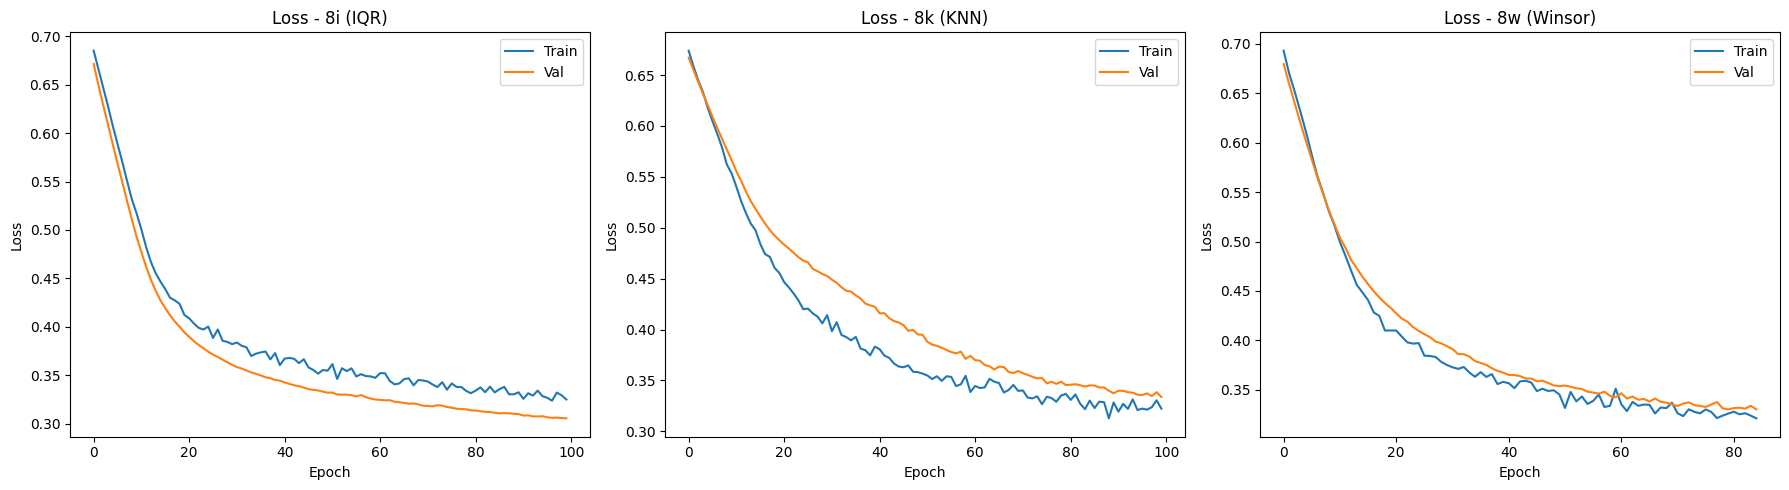

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history8i.history['loss'], label='Train')
plt.plot(history8i.history['val_loss'], label='Val')
plt.title('Loss - 8i (IQR)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history8k.history['loss'], label='Train')
plt.plot(history8k.history['val_loss'], label='Val')
plt.title('Loss - 8k (KNN)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history8w.history['loss'], label='Train')
plt.plot(history8w.history['val_loss'], label='Val')
plt.title('Loss - 8w (Winsor)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

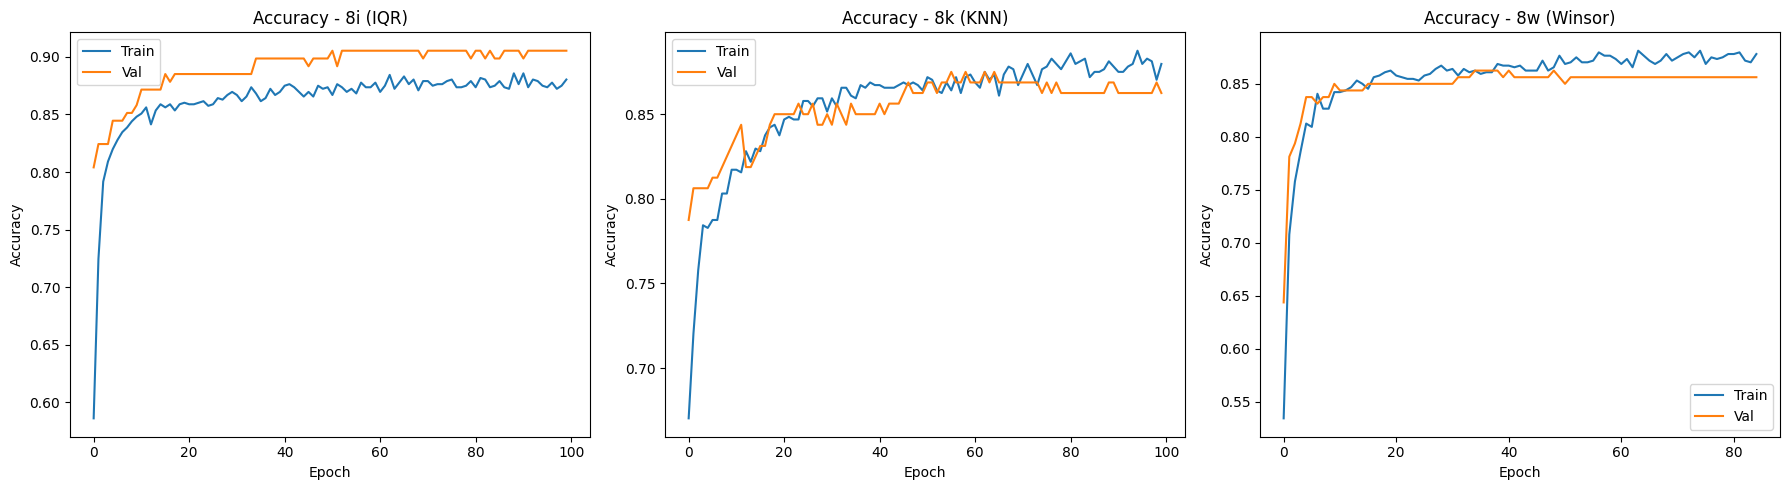

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(history8i.history['accuracy'], label='Train')
plt.plot(history8i.history['val_accuracy'], label='Val')
plt.title('Accuracy - 8i (IQR)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history8k.history['accuracy'], label='Train')
plt.plot(history8k.history['val_accuracy'], label='Val')
plt.title('Accuracy - 8k (KNN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history8w.history['accuracy'], label='Train')
plt.plot(history8w.history['val_accuracy'], label='Val')
plt.title('Accuracy - 8w (Winsor)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
with open("summary_8i.pkl", "rb") as f: s8i = pickle.load(f)
with open("summary_8k.pkl", "rb") as f: s8k = pickle.load(f)
with open("summary_8w.pkl", "rb") as f: s8w = pickle.load(f)

In [ ]:
results_8 = pd.DataFrame({
    "Metode Outlier": ["IQR", "KNN", "Winsorizing"],
    "Train Accuracy": [s8i["best_accuracy"], s8k["best_accuracy"], s8w["best_accuracy"]],
    "Test Accuracy":  [s8i["test_accuracy"], s8k["test_accuracy"], s8w["test_accuracy"]],
    "Best LR":        [s8i["best_config"][0], s8k["best_config"][0], s8w["best_config"][0]],
    "Best Filters":   [s8i["best_config"][1], s8k["best_config"][1], s8w["best_config"][1]],
    "Best Kernel":    [s8i["best_config"][2], s8k["best_config"][2], s8w["best_config"][2]],
})
results_8

,Metode Outlier,Train Accuracy,Test Accuracy,Best LR,Best Filters,Best Kernel
0,IQR,0.92,0.88,0.01,32,2
1,KNN,0.89,0.86,0.01,16,2
2,Winsorizing,0.89,0.85,0.01,64,3


In [ ]:
print("\n--- Final 8 Feature model architecture ---")
model_final_8i.summary()


--- Final 8 Feature model architecture ---


Model: "sequential_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_90 (Conv1D)              │ (None, 7, 32)          │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_90 (MaxPooling1D) │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_90 (Flatten)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_180 (Dense)               │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_181 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,109 (74.65 KB)

 Trainable params: 6,369 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,740 (49.77 KB)